In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd # pandas는 dataframe 형태로 쉽게 다루게 해주는 라이브러리
from sklearn.preprocessing import LabelEncoder # 데이터 전처리 관련 모듈
from sklearn import tree # 트리 관련 모듈
import graphviz #그래피컬하게 visualize 해줌

# 데이터 경로
file_path = "/gdrive/MyDrive/Colab/Week03/PlayTennis.csv"
#csv로 comma 단위로 feature 분기
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path) #판다스로 csv 파일을 dataframe으로 읽어오기

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy  day      time play
0      sunny   hot     high  False  Sun  20-10-33   no
1      sunny   hot     high   True  Mon  19-18-42   no
2   overcast   hot     high  False  Sun  17-32-01  yes
3      rainy  mild     high  False  Sat  20-19-41  yes
4      rainy  cool   normal  False  Sat  15-32-11  yes
5      rainy  cool   normal   True  Sun  21-15-23   no
6   overcast  cool   normal   True  Fri  05-21-53  yes
7      sunny  mild     high  False  Sat  19-54-25   no
8      sunny  cool   normal  False  Fri  20-15-11  yes
9      rainy  mild   normal  False  Mon  20-31-16  yes
10     sunny  mild   normal   True  Wed  19-43-22  yes
11  overcast  mild     high   True  Sun  19-22-13  yes
12  overcast   hot   normal  False  Sat  20-18-32  yes
13     rainy  mild     high   True  Thu  04-28-14   no
14  overcast   hot     high   True  Sat  20-19-03  yes
15     sunny   hot   normal   True  Sat  21-18-05  yes
16     rainy  mild   normal   True  sun  20-42-13   no
17     sun

In [ ]:
#여기는 문자열을 숫자로 데이터 변환하는(transform) 파트 -> 속도와 연산의 개선을 위해 숫자로 매핑
#전처리 하는 코드

# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리 -> 전처리 과정
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_ #play열은 정답 열(gold label set)
#classes_로 숫자로 매핑한 것들의 문자열을 다시 확인 가능
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook']) # outlook 열 전체를 들고와서 숫자로 분기해서 매핑
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['time'] = label_encoder.fit_transform(datas['time'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['play'] = label_encoder.fit_transform(datas['play'])

# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  time  play
0         2     1         0      0    3    10     0
1         2     1         0      1    1     6     0
2         0     1         0      0    3     5     1
3         1     2         0      0    2    14     1
4         1     0         1      0    2     3     1
5         1     0         1      1    3    17     0
6         0     0         1      1    0     1     1
7         2     2         0      0    2     9     0
8         2     0         1      0    0    11     1
9         1     2         1      0    1    15     1
10        2     2         1      1    5     8     1
11        0     2         0      1    3     7     1
12        0     1         1      0    2    12     1
13        1     2         0      1    4     0     0
14        0     1         0      1    2    13     1
15        2     1         1      1    2    18     1
16        1     2         1      1    7    16     0
17        2     2         1      0  

In [ ]:
# 입력 데이터와 정답 데이터로 분리
x_data = datas.drop(['play'], axis=1).iloc[:14, :]
test_data = datas.drop(['play'], axis=1).iloc[14:, :]
y_data = datas['play']
#drop(['play', axis=1])은 play라고 하는 열의 데이터들을 지워달라고 하고 x_data 구성하고 지운 play 데이터들은 y_data에 따로 분류하기

# 분리 결과 확인
print(x_data)
print()
print(test_data)
print()
print(y_data.iloc[:14])

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    3    10
1         2     1         0      1    1     6
2         0     1         0      0    3     5
3         1     2         0      0    2    14
4         1     0         1      0    2     3
5         1     0         1      1    3    17
6         0     0         1      1    0     1
7         2     2         0      0    2     9
8         2     0         1      0    0    11
9         1     2         1      0    1    15
10        2     2         1      1    5     8
11        0     2         0      1    3     7
12        0     1         1      0    2    12
13        1     2         0      1    4     0

    outlook  temp  humidity  windy  day  time
14        0     1         0      1    2    13
15        2     1         1      1    2    18
16        1     2         1      1    7    16
17        2     2         1      0    6     2
18        2     0         0      1    6     4

0     0
1     0
2     1
3     1


In [ ]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
#entropy 기준으로 결정 트리 객체 하나 생성. 다른 기준도 많음
train_result = decision_tree.fit(x_data, y_data.iloc[:14])
#결정 트리 객체에 입력 데이터와 정답 데이터를 이용해서 훈련 데이터를 학습시키면서 트리 생성
#fit은 training을 의미하는 함수

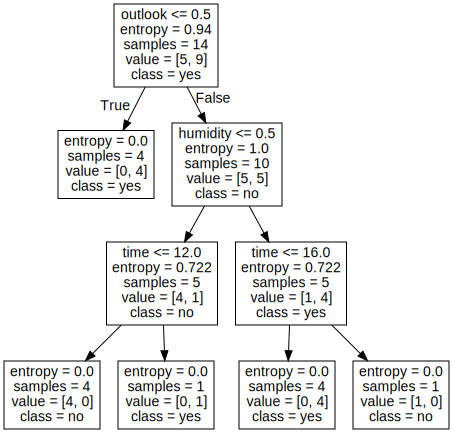

In [ ]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
#train_result를 feature_names에 입력데이터의 열을 class_names에 정답 데이터인 target_names를 대입
#여기서의 트리는 숫자로 바꿔서 최적의 트리를 생성함(강의자료의 트리는 기존 전통 트리로 한 번 위 노드에서 갈리면 그 feature를 다시 사용할 수 없음)
#추가로 여기 트리는 사용한 feature를 다시 사용 가능하며 binary tree로 최적화함
#트리라서 pruning 이라는 가지치기 특성 가능(속도 개선)
graph

In [ ]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(test_data)
#predict()은 학습한 모델을 이용해서 입력데이터를 예측하기

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data.iloc[14:])

#여기까지는 일단 day와 time에 해당하는 feature만 반영한 결과입니다.

14     True
15    False
16    False
17    False
18    False
Name: play, dtype: bool


In [110]:
import pandas as pd # pandas는 dataframe 형태로 쉽게 다루게 해주는 라이브러리
from sklearn.preprocessing import LabelEncoder # 데이터 전처리 관련 모듈
from sklearn import tree # 트리 관련 모듈
import graphviz #그래피컬하게 visualize 해줌

# 데이터 경로
file_path = "/gdrive/MyDrive/Colab/Week03/PlayTennis.csv"
#csv로 comma 단위로 feature 분기
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path) #판다스로 csv 파일을 dataframe으로 읽어오기

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy  day      time play
0      sunny   hot     high  False  Sun  20-10-33   no
1      sunny   hot     high   True  Mon  19-18-42   no
2   overcast   hot     high  False  Sun  17-32-01  yes
3      rainy  mild     high  False  Sat  20-19-41  yes
4      rainy  cool   normal  False  Sat  15-32-11  yes
5      rainy  cool   normal   True  Sun  21-15-23   no
6   overcast  cool   normal   True  Fri  05-21-53  yes
7      sunny  mild     high  False  Sat  19-54-25   no
8      sunny  cool   normal  False  Fri  20-15-11  yes
9      rainy  mild   normal  False  Mon  20-31-16  yes
10     sunny  mild   normal   True  Wed  19-43-22  yes
11  overcast  mild     high   True  Sun  19-22-13  yes
12  overcast   hot   normal  False  Sat  20-18-32  yes
13     rainy  mild     high   True  Thu  04-28-14   no
14  overcast   hot     high   True  Sat  20-19-03  yes
15     sunny   hot   normal   True  Sat  21-18-05  yes
16     rainy  mild   normal   True  sun  20-42-13   no
17     sun

In [111]:
#여기는 문자열을 숫자로 데이터 변환하는(transform) 파트 -> 속도와 연산의 개선을 위해 숫자로 매핑
#전처리 하는 코드

# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리 -> 전처리 과정
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_ #play열은 정답 열(gold label set)
#classes_로 숫자로 매핑한 것들의 문자열을 다시 확인 가능
print("target_names : {}".format(target_names))

#time과 day의 feature의 feature value에 대한 grouping을 통해 범위 축소
for i in range(len(datas['time'])):
  datas.loc[i, 'time'] = str(datas.loc[i, 'time'])[0:2]
  if 6<=int(datas['time'][i])<14:
    datas.loc[i, 'time'] = "주간"
  elif 14<=int(datas['time'][i])<22:
    datas.loc[i, 'time']="전반야"
  else:
    datas.loc[i, 'time']="후반야"
#time은 제가 복무하던 군대 기준 06~14를 주간으로, 14~22시를 전반야로 22~06시를 후반야로 grouping

for i in range(len(datas['day'])):
  if datas.loc[i, 'day'] == "Sat" or datas.loc[i, 'day']=="Sun":
    datas.loc[i, 'day']="주말"
  else:
    datas.loc[i, 'day']="평일"
#day는 주말과 평일로 grouping

print(datas)
datas['outlook'] = label_encoder.fit_transform(datas['outlook']) # outlook 열 전체를 들고와서 숫자로 분기해서 매핑
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['time'] = label_encoder.fit_transform(datas['time'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['play'] = label_encoder.fit_transform(datas['play'])
print()
# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
     outlook  temp humidity  windy day time play
0      sunny   hot     high  False  주말  전반야   no
1      sunny   hot     high   True  평일  전반야   no
2   overcast   hot     high  False  주말  전반야  yes
3      rainy  mild     high  False  주말  전반야  yes
4      rainy  cool   normal  False  주말  전반야  yes
5      rainy  cool   normal   True  주말  전반야   no
6   overcast  cool   normal   True  평일  후반야  yes
7      sunny  mild     high  False  주말  전반야   no
8      sunny  cool   normal  False  평일  전반야  yes
9      rainy  mild   normal  False  평일  전반야  yes
10     sunny  mild   normal   True  평일  전반야  yes
11  overcast  mild     high   True  주말  전반야  yes
12  overcast   hot   normal  False  주말  전반야  yes
13     rainy  mild     high   True  평일  후반야   no
14  overcast   hot     high   True  주말  전반야  yes
15     sunny   hot   normal   True  주말  전반야  yes
16     rainy  mild   normal   True  평일  전반야   no
17     sunny  mild   normal  False  평일   주간   no
18     sunny  cool     high   True  평일  전

In [ ]:
# 입력 데이터와 정답 데이터로 분리
x_data = datas.drop(['play'], axis=1).iloc[:14, :]
test_data = datas.drop(['play'], axis=1).iloc[14:, :]
y_data = datas['play']
#drop(['play', axis=1])은 play라고 하는 열의 데이터들을 지워달라고 하고 x_data 구성하고 지운 play 데이터들은 y_data에 따로 분류하기

# 분리 결과 확인
print(x_data)
print()
print(test_data)
print()
print(y_data.iloc[:14])

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    0     0
1         2     1         0      1    1     0
2         0     1         0      0    0     0
3         1     2         0      0    0     0
4         1     0         1      0    0     0
5         1     0         1      1    0     0
6         0     0         1      1    1     2
7         2     2         0      0    0     0
8         2     0         1      0    1     0
9         1     2         1      0    1     0
10        2     2         1      1    1     0
11        0     2         0      1    0     0
12        0     1         1      0    0     0
13        1     2         0      1    1     2

    outlook  temp  humidity  windy  day  time
14        0     1         0      1    0     0
15        2     1         1      1    0     0
16        1     2         1      1    1     0
17        2     2         1      0    1     1
18        2     0         0      1    1     0

0     0
1     0
2     1
3     1


In [ ]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
#entropy 기준으로 결정 트리 객체 하나 생성. 다른 기준도 많음
train_result = decision_tree.fit(x_data, y_data.iloc[:14])
#결정 트리 객체에 입력 데이터와 정답 데이터를 이용해서 훈련 데이터를 학습시키면서 트리 생성
#fit은 training을 의미하는 함수

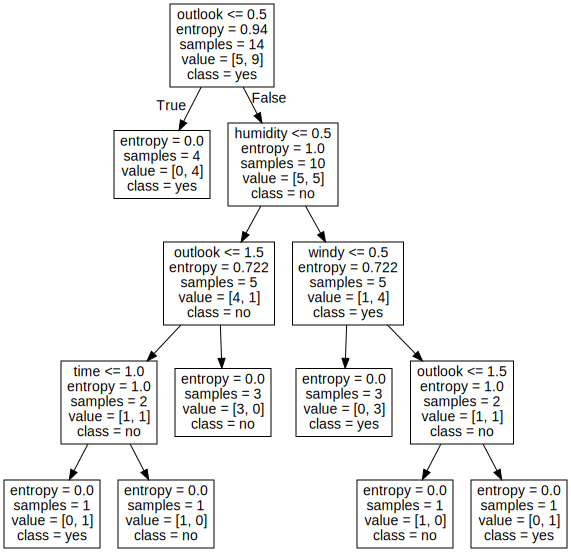

In [ ]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
#train_result를 feature_names에 입력데이터의 열을 class_names에 정답 데이터인 target_names를 대입
#여기서의 트리는 숫자로 바꿔서 최적의 트리를 생성함(강의자료의 트리는 기존 전통 트리로 한 번 위 노드에서 갈리면 그 feature를 다시 사용할 수 없음)
#추가로 여기 트리는 사용한 feature를 다시 사용 가능하며 binary tree로 최적화함
#트리라서 pruning 이라는 가지치기 특성 가능(속도 개선)
graph

In [ ]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(test_data)
#predict()은 학습한 모델을 이용해서 입력데이터를 예측하기

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data.iloc[14:])

'''
이 결과는 time과 day feature에 대한 grouping으로 전처리를 하고 나서 학습을 시켰습니다.
이렇게 수정한 후에는 데이터의 전처리 과정을 통해서 데이터의 범주형 특징을 더 잘 처리할 수 있다는 점과 데이터의 해석력을 향상시킬 수 있다는 점에 있습니다.
추가로 이렇게 수정하게 되면 여러 이점이 있는데 이를 조금 더 구체적으로 기술하면

1. 'time' 열의 데이터 변환으로 기존 코드에서는 'time' 열의 시간 정보를 직접 문자열로 변경하고 조건에 따라 '주간', '전반야', '후반야'로 변환하고 있습니다.
수정된 코드에서는 루프를 사용하여 각 행을 처리하고 시간 범위에 따라 '주간', '전반야', '후반야'로 변경하고 있습니다.
이렇게 하면 코드의 명확성이 향상되며 시간 범위에 대한 조건이 더 잘 드러납니다.
수정하지 않았다면 시간대별로 다른 값이 주어지며 학습하기 쉽지 않았을텐데 명확하게 grouping을 하면서 학습의 성능을 향상시킬 수 잇었습니다.

2. 마찬가지로 'day' 열의 데이터 변환으로 'day' 열에 대한 변환 로직도 루프를 사용하여 '주말' 또는 '평일'로 변경하고 있습니다.
이렇게 하면 코드가 읽기 쉽고 이해하기 쉽습니다.
수정하지 않았다면 요일별로 다른 값이 주어지며 학습하기 쉽지 않았을텐데 명확한 grouping으로 학습의 성능을 향상시킬 수 있었습니다.

즉, 많은 데이터들을 범주형 특징 처리를 통해서 결정 트리는 범주형 특징을 처리하기 쉽습니다.
수정된 코드는 'time', 'day'와 같은 범주형 열을 grouping 후에 수치형으로 변환하고 있습니다.
이렇게 범주형 데이터를 일부 구간 별로 grouping한 후에 수치형으로 변환하면 결정 트리 모델이 더 잘 처리하고 분석할 수 있습니다.

게다가 더 나은 해석력을 제공해서 데이터를 더 의미 있는 범주로 변환함으로써 모델이 생성한 결정 트리를 해석하기가 더 쉬워집니다.
수정한대로 'time' 열을 '주간', '전반야', '후반야'로 변환하면 모델이 시분초 단위가 아닌 시간대에 따라 테니스를 할 것인지 여부를 결정하는데 더 직관적인 규칙을 학습할 수 있습니다.
마찬가지로 'day' 열을 '주말' 또는 '평일'로 변환하면 요일별 단위가 아니라 주말과 평일로 이분화해서 판단 규칙을 이해하기 쉬워집니다.

추가로 높은 성능 결정 트리는 범주형 데이터와 연속형 데이터 모두를 처리할 수 있지만 범주형 데이터를 적절한 grouping 전처리를 한 후에 수치형으로 변환하면 일반적으로 모델의 성능을 향상시킬 수 있습니다.
수정된 코드는 범주형 데이터를 명확하게 변환하고 이로 인해 결정 트리 모델이 데이터의 패턴을 더 잘 파악하고 예측 성능을 향상시킬 수 있습니다.
'''

14     True
15     True
16     True
17    False
18    False
Name: play, dtype: bool
